In [321]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [322]:
#import warnings
import warnings
warnings.filterwarnings('ignore')


In [323]:
#loading dataset
data=pd.read_csv("healthcare-dataset-stroke-data.csv")


In [324]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory data analysis

In [325]:
data.shape

(5110, 12)

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Axes: >

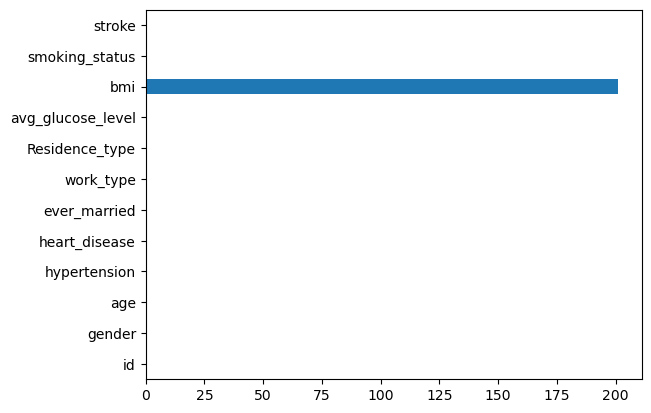

In [327]:
#null values of the datset
data.isnull().sum()
data.isna().sum().plot.barh()

<Axes: xlabel='bmi', ylabel='Count'>

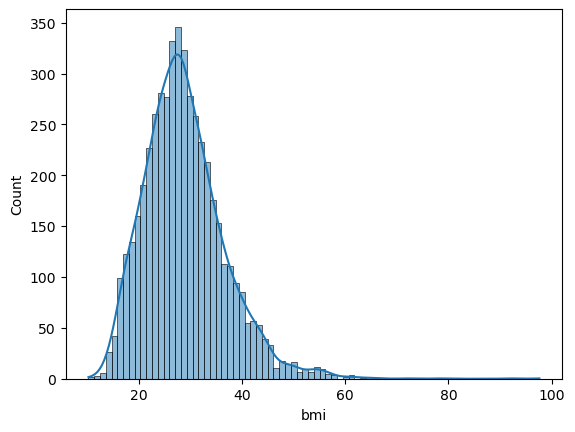

In [328]:
# Create a histogram of the 'bmi' data with a KDE overlay
sns.histplot(data['bmi'],kde = True)

<Axes: >

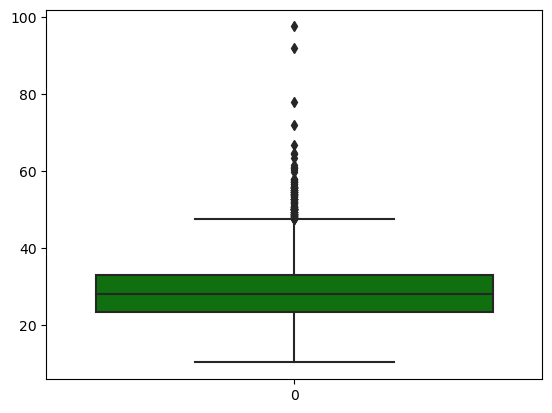

In [329]:
# Create a green boxplot of the 'bmi' data
sns.boxplot(data = data['bmi'],color = 'green')

# Lets fill Null Values

In [330]:
#fill null values in the column - bmi
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [331]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [332]:
#filling with mean value
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [333]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [334]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [335]:
#dropping id columns
data.drop('id',axis=1,inplace=True)

In [336]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [337]:
#count the valuesiin the gender column
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: ylabel='gender'>

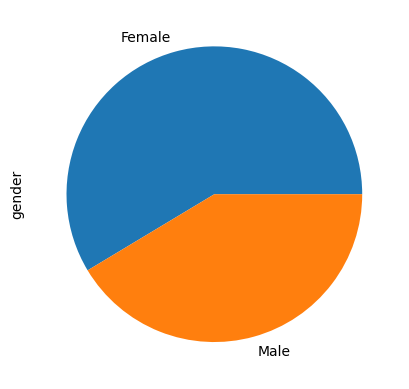

In [338]:
data['gender'] = data['gender'].replace('Other','Female')
data['gender'].value_counts().plot(kind="pie")

# Outlier Removation

In [339]:
#outlier analysis
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

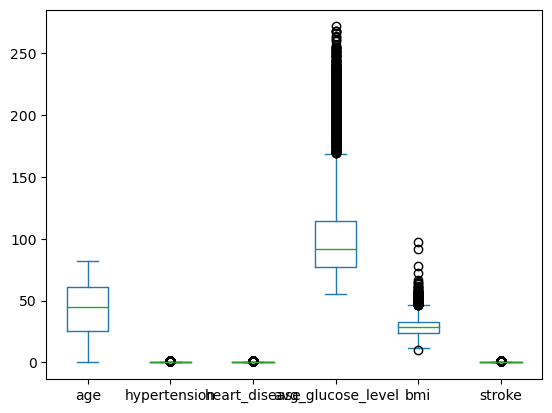

In [340]:
data.plot(kind='box')
plt.show()

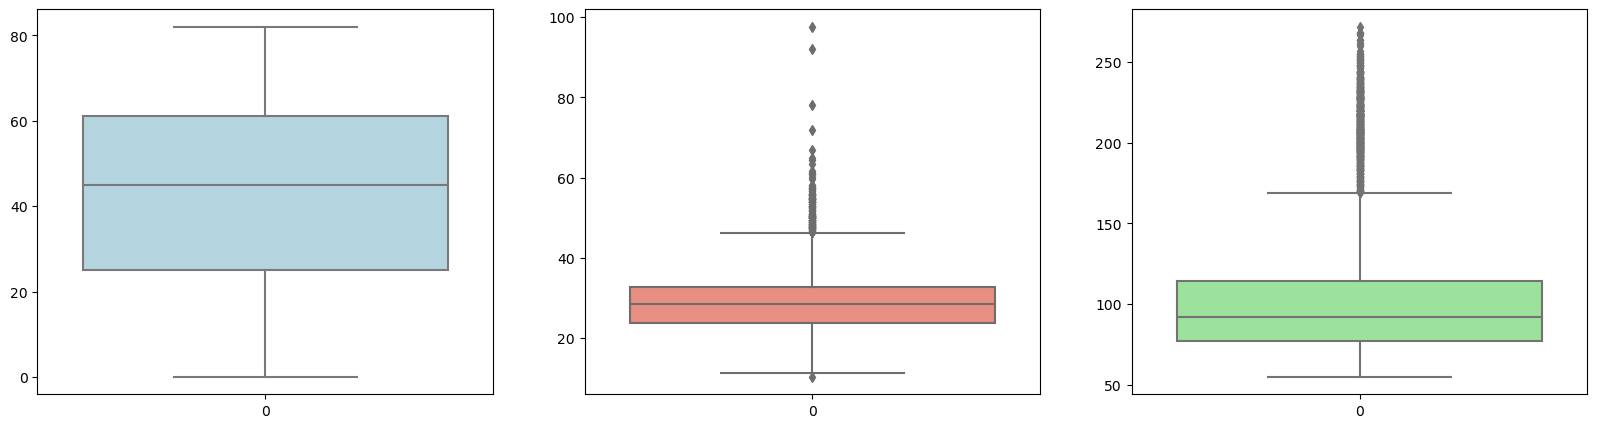

In [341]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

vars = ['age', 'bmi', 'avg_glucose_level']
colors = ['lightblue', 'salmon', 'lightgreen']

for var, i in zip(vars,
                  range(len(vars))):
    
    sns.boxplot(data[var],
                ax=ax[i],
                color=colors[i]);

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

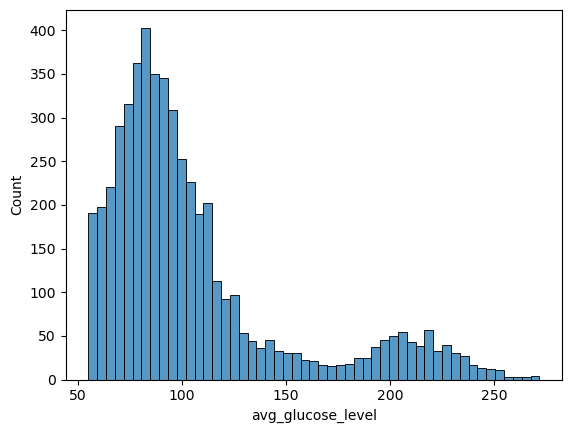

In [342]:
#histogram of glucose level
sns.histplot(data=data['avg_glucose_level'])

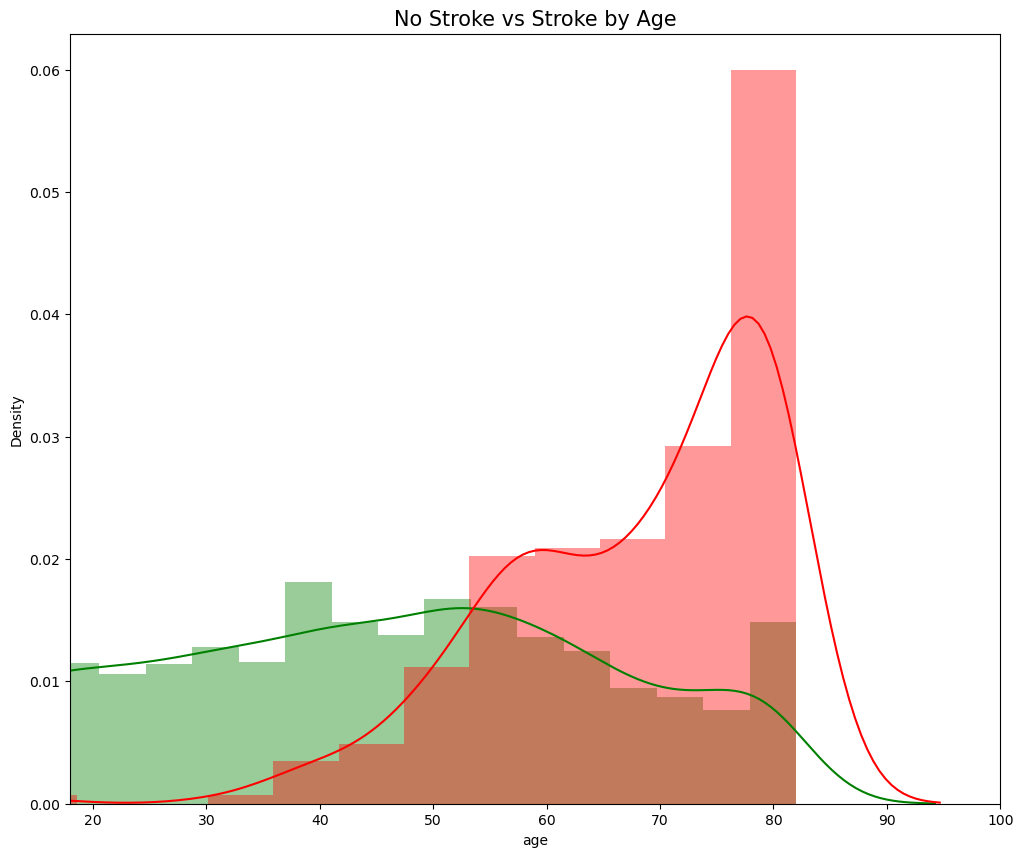

In [343]:
plt.figure(figsize=(12, 10))

# Creating distribution plots for age based on stroke status
sns.distplot(data[data['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["age"], color='red') # Stroke - Red

# Setting title and axes labels
plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

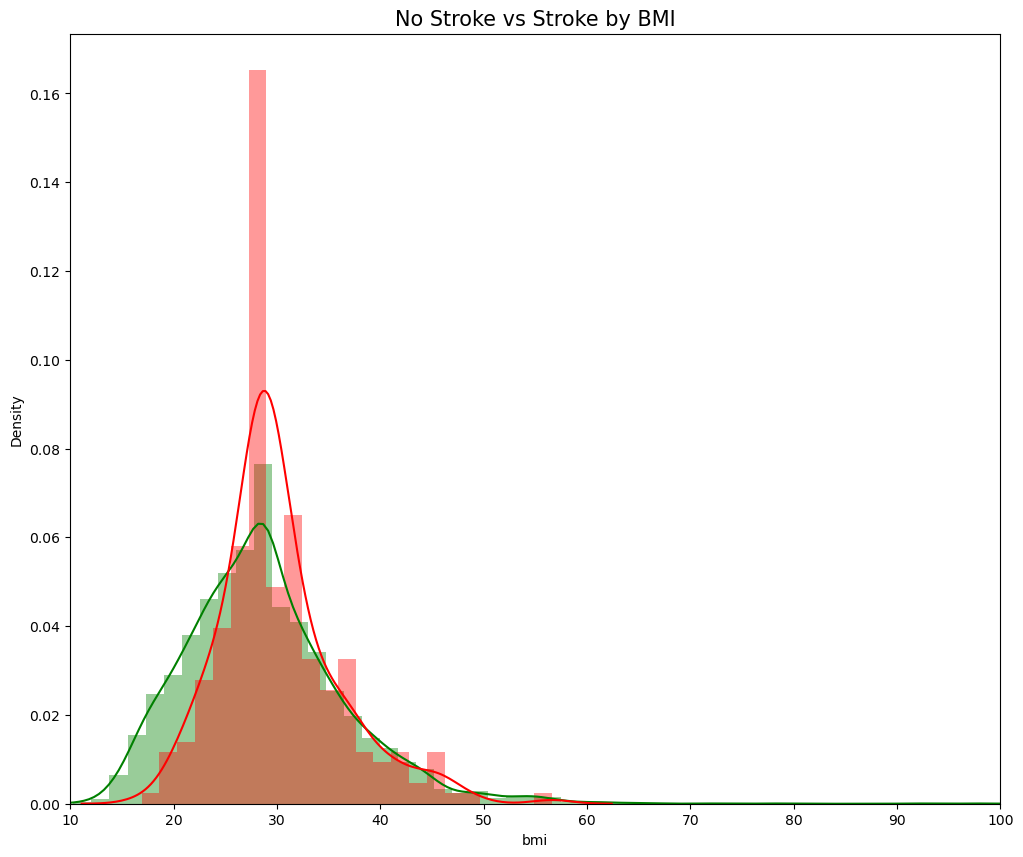

In [344]:

plt.figure(figsize=(12,10))

# Create BMI distribution plots, color-coded for stroke status
sns.distplot(data[data['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["bmi"], color='red') # Stroke - Red

# Set title, labels, and BMI range
plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

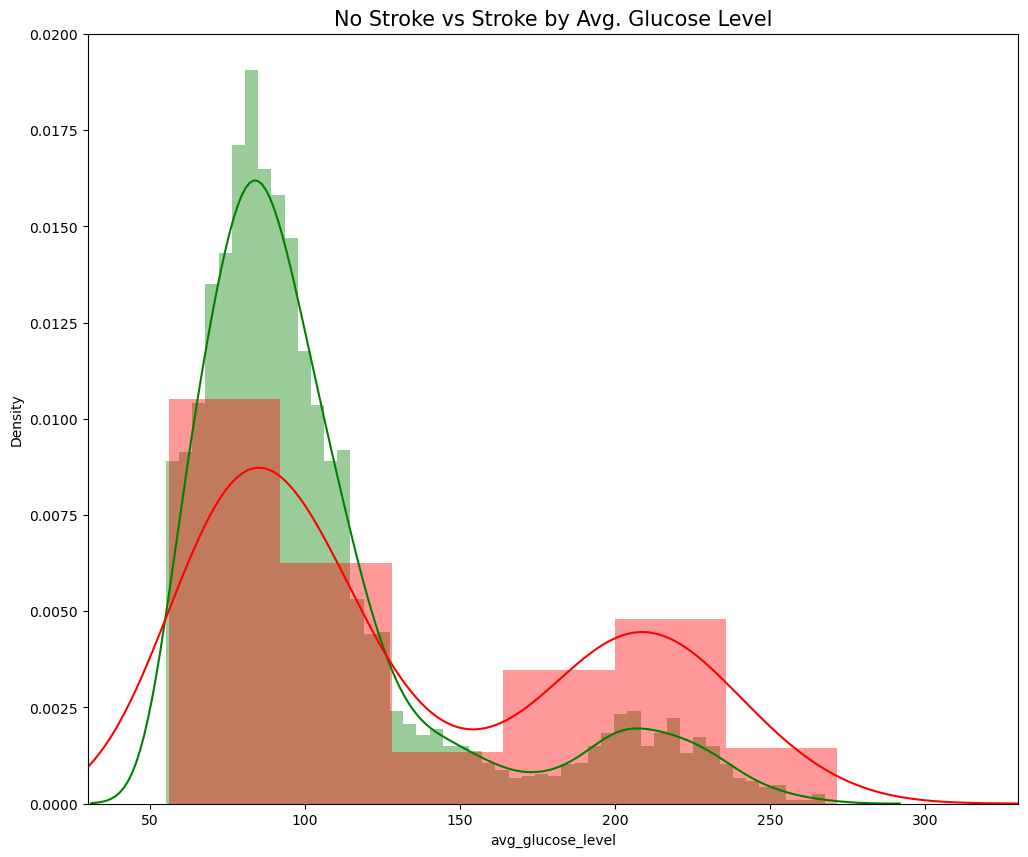

In [345]:
plt.figure(figsize=(12,10))

# Creating distribution plots for average glucose levels by stroke status
sns.distplot(data[data['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

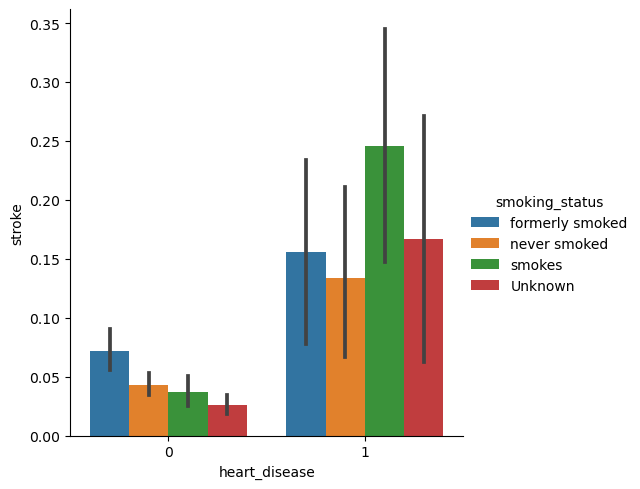

In [346]:
# Create a categorical bar plot 
sns.catplot(x="heart_disease", y="stroke", hue='smoking_status', kind="bar", data=data);


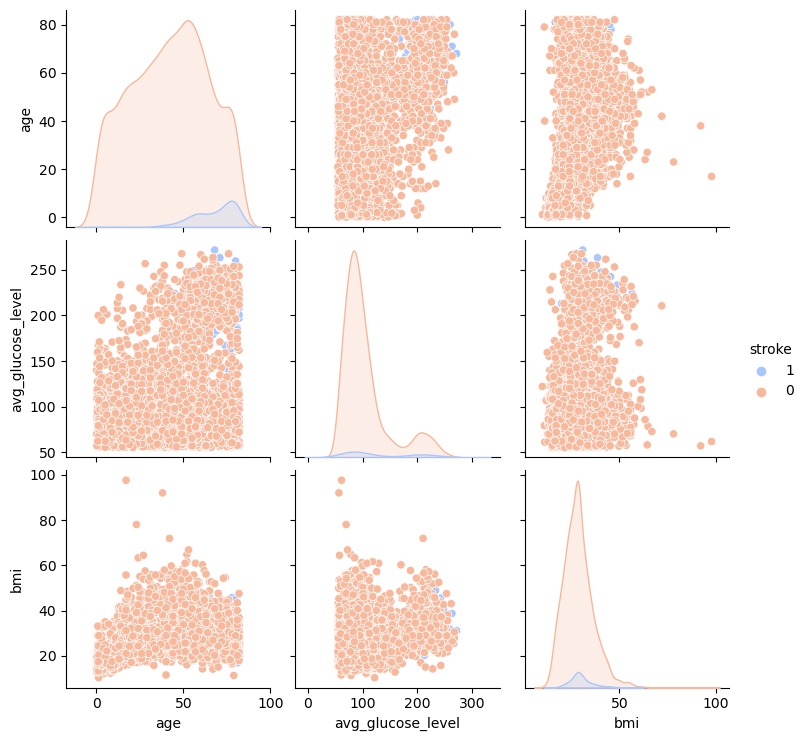

In [347]:
#pairplot
sns.pairplot(data.drop(['hypertension', 
                      'heart_disease'], axis=1), 
             hue='stroke',
             palette='coolwarm',
             hue_order=[1,0]);

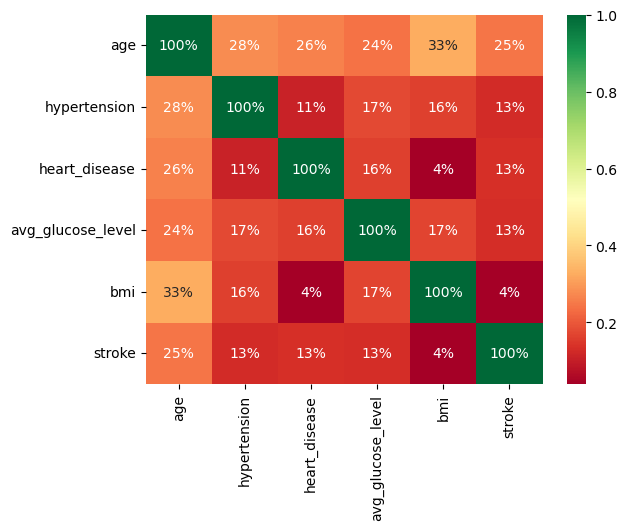

In [348]:
#correlation matrix
cor = data.corr()
sns.heatmap(cor, annot=True, fmt='.0%', cmap='RdYlGn');
plt.show()

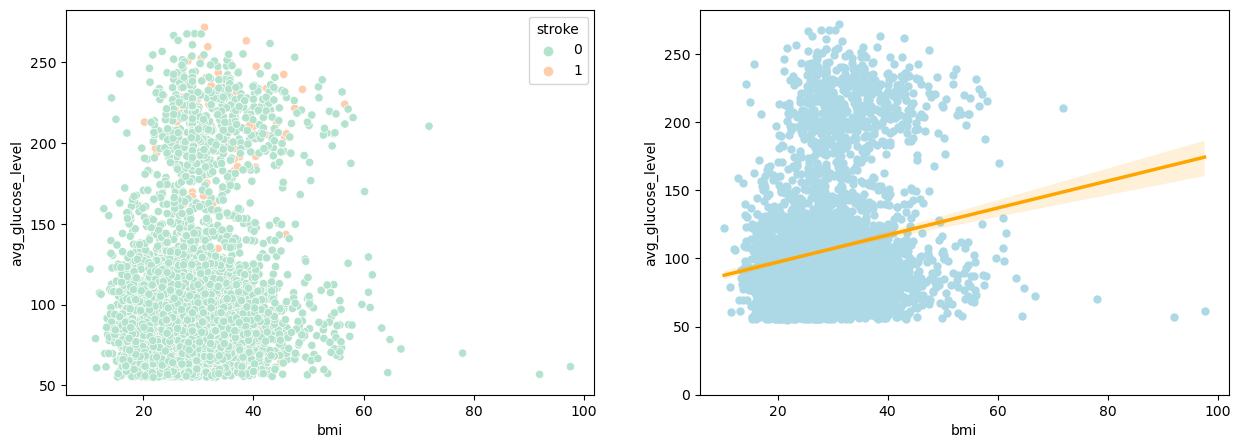

In [349]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

#Subplot 1: Scatterplot
sns.scatterplot(data=data,
                x='bmi',
                y='avg_glucose_level',
                hue='stroke',
                ax=ax[0],
                palette='Pastel2');

#Subplot 2: Scatterplot with Regression Line
sns.regplot(data=data,
            x='bmi',
            y='avg_glucose_level',
            ax=ax[1],
            scatter_kws={'s':25, 'color':'lightblue', "alpha":1}, 
            line_kws={'color': 'orange','lw':2.5}).set(ylim=(0));

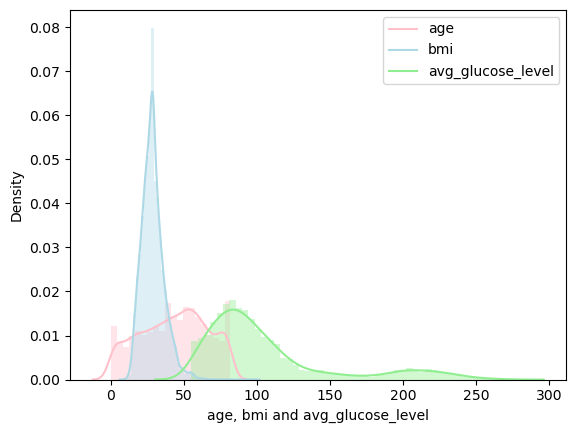

In [350]:
sns.distplot(data['age'], color='pink');
sns.distplot(data['bmi'], color='lightblue');
sns.distplot(data['avg_glucose_level'], color='lightgreen');

plt.legend(['age','bmi','avg_glucose_level']);
plt.xlabel('age, bmi and avg_glucose_level');

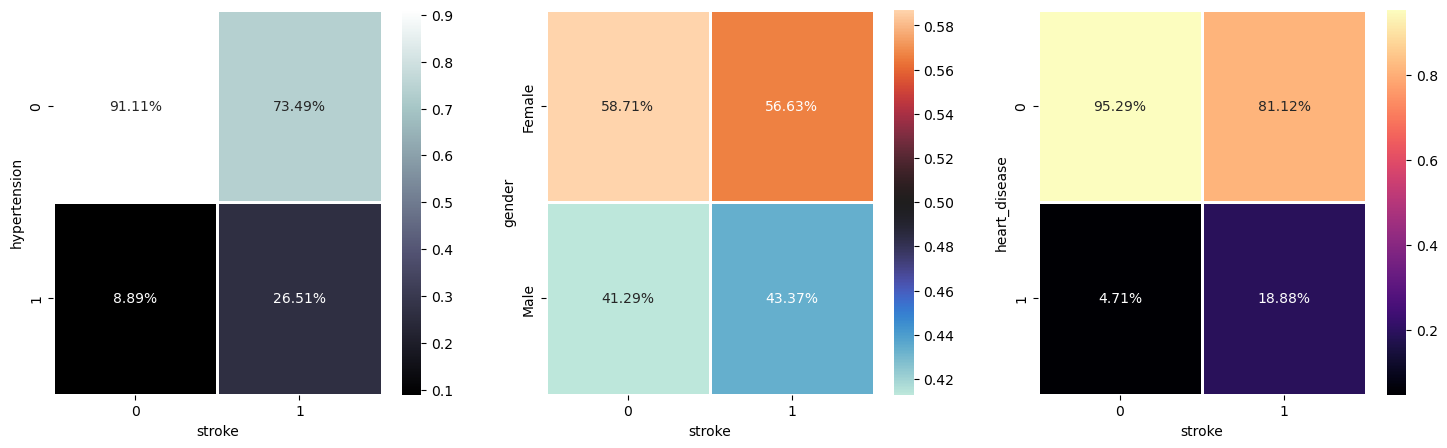

In [351]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

vars = ['hypertension', 'gender', 'heart_disease']
cmaps = ['bone', 'icefire', 'magma']

for var, i in zip(vars, range(3)):
    ctab = pd.crosstab(data[var], 
                   data['stroke'], 
                   normalize='columns')

    sns.heatmap(ctab, 
                annot=True, 
                fmt='.2%', 
                ax=ax[i],
                cmap=cmaps[i], 
                linewidths=1);

<Axes: >

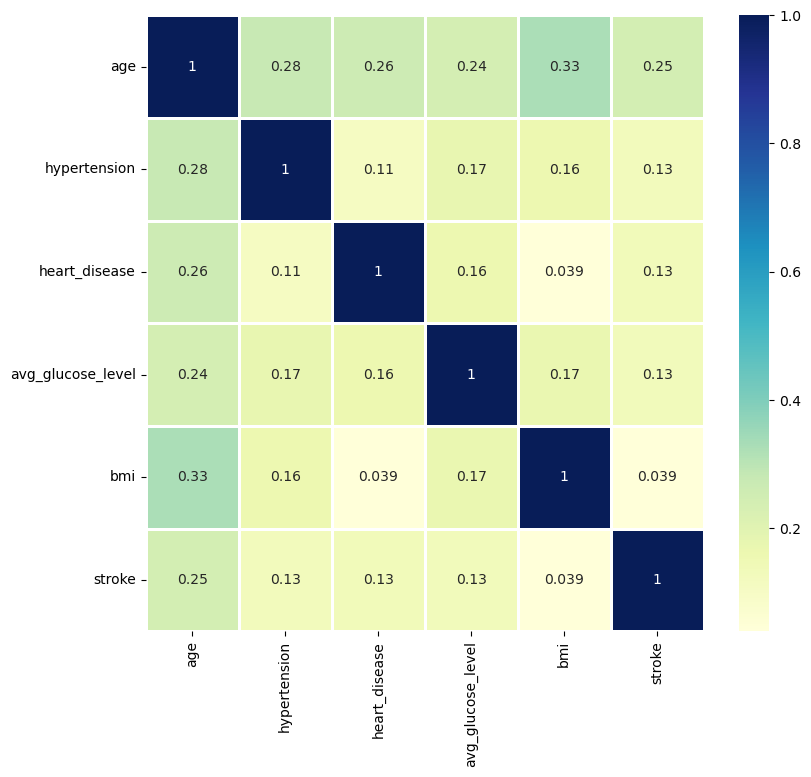

In [352]:
#correlation matrix
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

# label Encoder

In [353]:
# Create a label encoder instance
enc=LabelEncoder()

In [354]:
# Encode the 'gender' column
gender=enc.fit_transform(data['gender'])

In [355]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [356]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [357]:
#Replacing original columns 
data['work_type']=work_type

In [358]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [359]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# visualization and plots


In [361]:
cols = data.columns[:-1]
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [362]:
#numerical and categorical columns
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

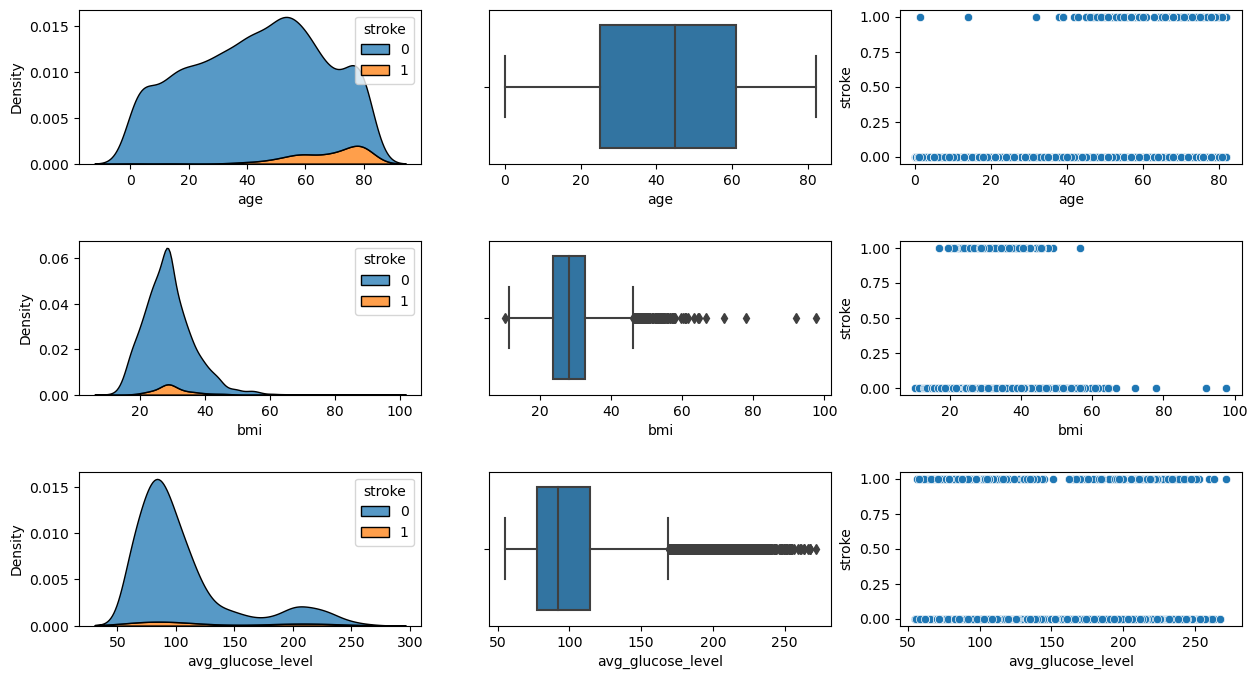

In [363]:
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5)

# Loop through each numerical column for plotting
for i, num_col in enumerate(numeric_columns):
    sns.kdeplot(x=num_col, hue='stroke', data=data, multiple='stack', ax=ax[i, 0])
    sns.boxplot(x=num_col, data=data, ax=ax[i, 1])
    sns.scatterplot(x=num_col, y='stroke', data=data, ax=ax[i, 2]) 
    
plt.show()


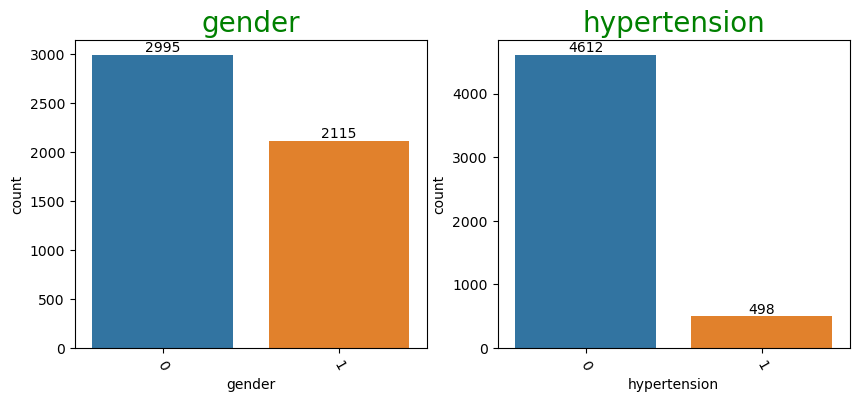

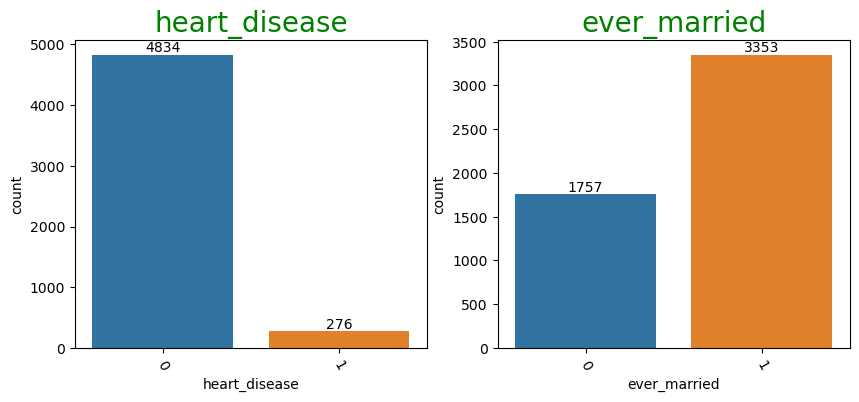

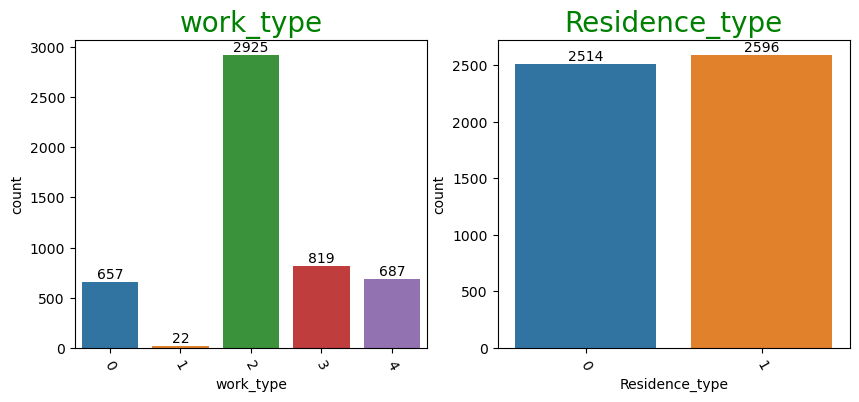

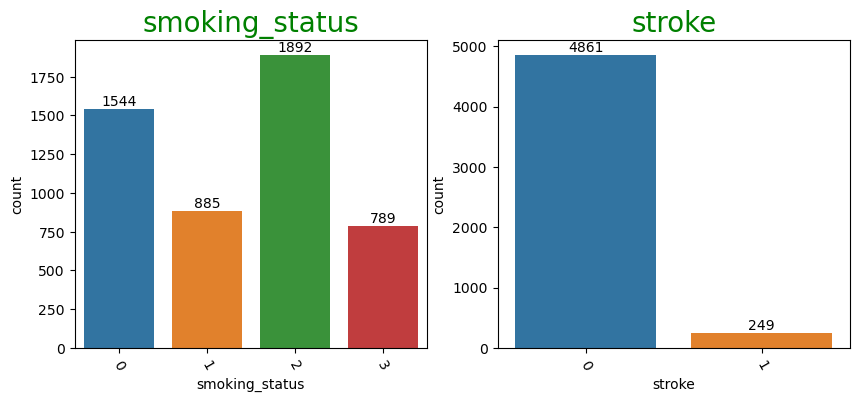

In [364]:
i=0
while i<8 :
# Create a figure with 2 subplots    
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, color='green')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, color='green')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

In [365]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# Splitting the data for train and test

X ---train_X,test_X  80/20                   
Y ---train_Y,test_Y

In [366]:
X=data.drop('stroke',axis=1)

In [367]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [368]:
Y=data['stroke']

In [369]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [370]:
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [371]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1,49.0,0,0,1,2,0,79.64,28.893237,3
4733,1,67.0,0,0,1,2,0,83.16,25.500000,1
3905,1,78.0,0,0,1,2,1,208.85,24.400000,1
4700,1,47.0,0,0,1,2,0,110.14,30.500000,3
4939,0,59.0,0,0,1,2,1,71.08,28.100000,2
...,...,...,...,...,...,...,...,...,...,...
1180,0,62.0,0,0,1,2,0,82.57,36.000000,1
3441,0,59.0,0,0,1,3,1,90.06,28.900000,3
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
4623,1,25.0,0,0,1,0,1,166.38,23.100000,2


In [372]:
Y_train

2285    0
4733    0
3905    0
4700    0
4939    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: stroke, Length: 4088, dtype: int64

In [373]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,0,58.00,0,0,1,2,0,100.42,39.500000,3
1141,1,57.00,0,0,1,2,0,90.06,29.800000,0
146,1,65.00,0,0,1,3,1,68.43,28.893237,1
3883,0,1.64,0,0,0,4,1,69.89,18.100000,0
1044,0,79.00,0,0,1,0,1,93.89,30.400000,2
...,...,...,...,...,...,...,...,...,...,...
2261,1,59.00,0,0,1,2,1,60.35,25.900000,1
4712,1,57.00,0,0,1,2,1,93.04,29.200000,2
4971,0,63.00,0,0,1,2,1,57.06,37.900000,2
2224,1,57.00,0,0,1,2,0,76.28,31.400000,1


In [374]:
Y_test

2413    0
1141    0
146     1
3883    0
1044    0
       ..
2261    0
4712    0
4971    0
2224    0
4825    0
Name: stroke, Length: 1022, dtype: int64

# Normalize

In [375]:
#normalize the content
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.492578,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [376]:
std=StandardScaler()

In [377]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [378]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

In [379]:
X_test_std

array([[-0.83780372,  0.64952452, -0.33069968, ..., -0.12678509,
         1.38727506,  1.51158251],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.35586361,
         0.12078063, -1.28365994],
       [ 1.19359699,  0.95856622, -0.33069968, ..., -0.83414241,
         0.00238781, -0.35191245],
       ...,
       [-0.83780372,  0.87026859, -0.33069968, ..., -1.08555387,
         1.17836876,  0.57983503],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.66056457,
         0.32968693, -0.35191245],
       [-0.83780372, -1.29302329, -0.33069968, ..., -0.75962556,
        -1.31545016, -1.28365994]])

# Training

# Initialization of confusion matrix

In [380]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()

# Decision Tree

In [381]:
#decision tree -Creating decision tree classifier object  
dt=DecisionTreeClassifier()

In [382]:
#standardized training data
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [383]:
dt.feature_importances_

array([0.04005551, 0.17576117, 0.024786  , 0.01807359, 0.02426885,
       0.0552833 , 0.02824611, 0.29724999, 0.27399669, 0.06227878])

In [384]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [385]:
# Generate predictions on the standardized test
Y_pred=dt.predict(X_test_std)

In [386]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [387]:
 # Calculate the accuracy of predictions
accuracy_dt=accuracy_score(Y_test,Y_pred)

In [388]:
# print accuracy score
accuracy_dt

0.9021526418786693

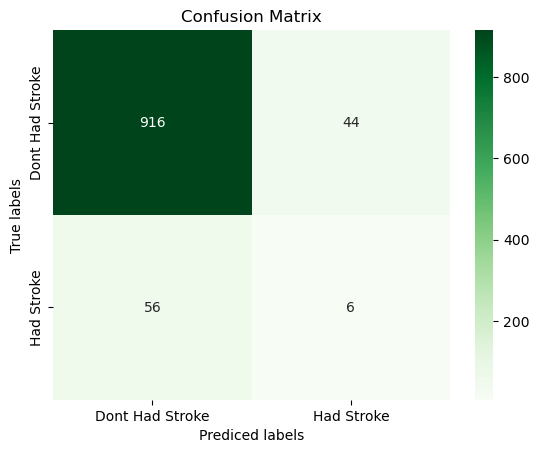

In [389]:
#ploting confusion matrx
plot_confusion_matrix(Y_test, Y_pred)

In [390]:
# Generate a detailed report
cr = metrics.classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       960
           1       0.12      0.10      0.11        62

    accuracy                           0.90      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.89      0.90      0.90      1022



# Logistic Regression

In [391]:
#logistic regression 
lr=LogisticRegression()

In [392]:
#standardized training data
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [393]:
# Generate predictions on the standardized test
Y_pred_lr=lr.predict(X_test_std)

In [394]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [395]:
# Calculate the accuracy of predictions
accuracy_lr=accuracy_score(Y_test,Y_pred_lr)

In [396]:
# print accuracy score
accuracy_lr

0.9383561643835616

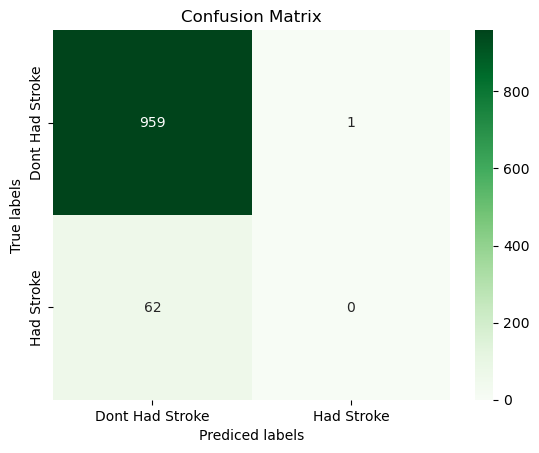

In [397]:
#ploting confusion matrx
plot_confusion_matrix(Y_test, Y_pred_lr)

In [398]:
# Generate a detailed report
cr = metrics.classification_report(Y_test, Y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



# KNN

In [399]:
#KNeighborsClassifier
knn=KNeighborsClassifier()

In [400]:
#standardized training data
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [401]:
# Generate predictions on the standardized test
Y_pred=knn.predict(X_test_std)

In [402]:
# Calculate the accuracy of predictions
accuracy_knn=accuracy_score(Y_test,Y_pred)

In [403]:
# print accuracy score
accuracy_knn

0.9344422700587084

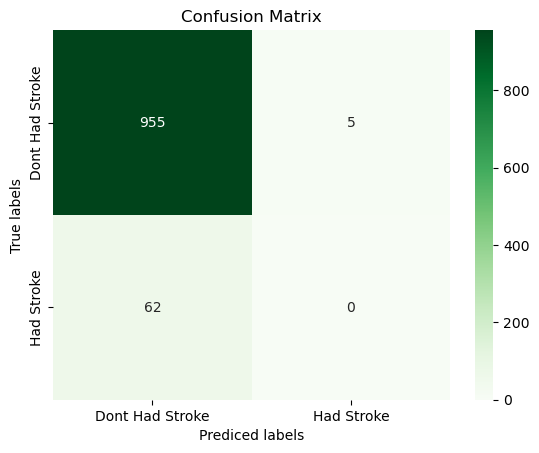

In [404]:
#ploting confusion matrx
plot_confusion_matrix(Y_test, Y_pred)

In [405]:
# Generate a detailed report
cr = metrics.classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.93      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.93      0.91      1022



# Random Forest

In [406]:
#random forest
rf=RandomForestClassifier()

In [407]:
#standardized training data
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [408]:
# Generate predictions on the standardized test
Y_pred=rf.predict(X_test_std)

In [409]:
# Calculate the accuracy of predictions
accuracy_rf=accuracy_score(Y_test,Y_pred)

In [410]:
accuracy_rf

0.9363992172211351

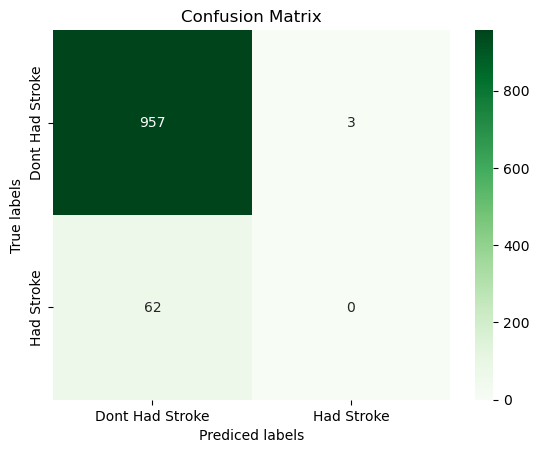

In [411]:
#ploting confusion matrx
plot_confusion_matrix(Y_test, Y_pred)

In [412]:
# Generate a detailed report
cr = metrics.classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



# SVM

In [413]:
#svm
sv=SVC()

In [414]:
#standardized training data
sv.fit(X_train_std,Y_train)

SVC()

In [415]:
# Generate predictions on the standardized test
Y_pred=sv.predict(X_test_std)

In [416]:
# Calculate the accuracy of predictions
accuracy_sv=accuracy_score(Y_test,Y_pred)

In [417]:
# print accuracy score
accuracy_sv

0.9393346379647749

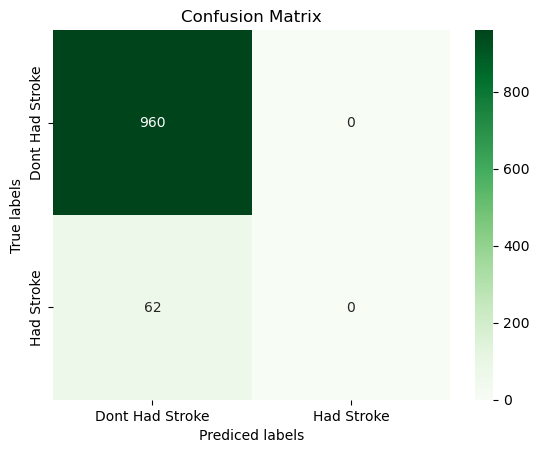

In [418]:
#ploting confusion matrx
plot_confusion_matrix(Y_test, Y_pred)

In [419]:
# Generate a detailed report
cr = metrics.classification_report(Y_test, Y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



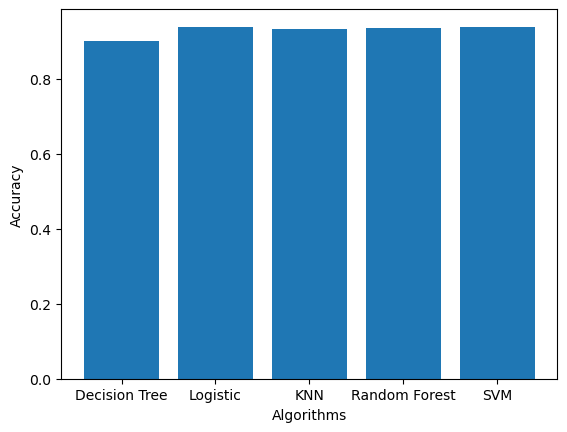

In [420]:
#combaring the algorithms
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[accuracy_dt,accuracy_lr,accuracy_knn,accuracy_rf,accuracy_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

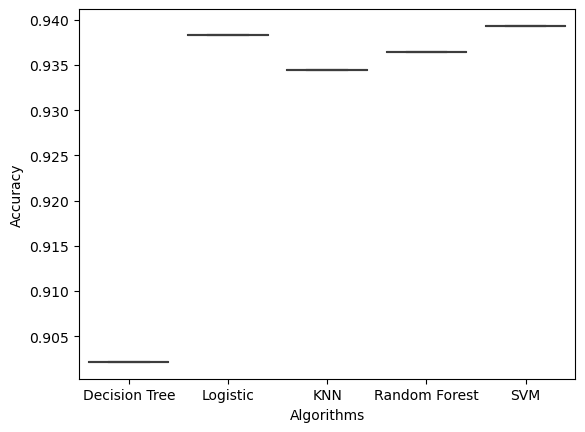

In [421]:
data = {'Algorithm': ['Decision Tree', 'Logistic', 'KNN', 'Random Forest', 'SVM'],
        'Accuracy': [accuracy_dt, accuracy_lr, accuracy_knn, accuracy_rf, accuracy_sv]}

sns.boxplot(x = 'Algorithm', y = 'Accuracy', data=data)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show() 